In [ ]:
'''
Epoch: [0][  1/391]	Time  6.235 ( 6.235)	Data  0.418 ( 0.418)	Loss 5.3189e+00 (5.3189e+00)	Acc@1   1.17 (  1.17)	Acc@5   3.12 (  3.12)
Epoch: [0][ 11/391]	Time  0.094 ( 0.650)	Data  0.000 ( 0.039)	Loss 5.3370e+00 (5.3390e+00)	Acc@1   0.39 (  0.46)	Acc@5   1.56 (  2.38)
Epoch: [0][ 21/391]	Time  0.095 ( 0.386)	Data  0.000 ( 0.023)	Loss 5.3192e+00 (5.3296e+00)	Acc@1   0.78 (  0.50)	Acc@5   3.12 (  2.77)
Test: [ 1/40]	Time  0.537 ( 0.537)	Loss 4.2666e+00 (4.2666e+00)	Acc@1  11.33 ( 11.33)	Acc@5  32.03 ( 32.03)
Test: [11/40]	Time  0.041 ( 0.088)	Loss 4.8308e+00 (4.6824e+00)	Acc@1   6.25 (  3.98)	Acc@5  14.06 ( 16.90)
Test: [21/40]	Time  0.058 ( 0.068)	Loss 4.83epoche+00 (4.7587e+00)	Acc@1   0.00 (  3.37)	Acc@5   7.81 ( 13.21)
Test: [31/40]	Time  0.041 ( 0.060)	Loss 4.8972e+00 (4.7860e+00)	Acc@1   0.00 (  3.23)	Acc@5   8.59 ( 13.26)
Test Acc tensor([3.4700]), recal 6.940000057220epoch9, precision nan, F1-score 1.4896121025085epoch
 *   Acc@1 3.470 Acc@5 15.320
'''

In [48]:
import re
import pandas as pd

In [143]:
def todf(path,epochs):
    train_loss = [0]*epochs
    train_acc1 = [0]*epochs
    train_acc5 = [0]*epochs
    train_time = [0]*epochs
    val_loss = [0]*epochs
    val_acc1 = [0]*epochs
    val_acc5 = [0]*epochs
    val_time = [0]*epochs
    f1_score = [0]*epochs
    epoch = 0
    with open(path+"_model\\"+path+'_log.txt','r') as f:
        line = f.readline()
        while line:
            number = [float(i) for i in re.findall(re.compile('[0-9.e+-]+'),line) if  (i != 'e') and (i!='1-')]
            if line[0:6] == "Epoch:":
                if epoch != int(number[0]):
                    epoch = int(number[0])
                train_loss[epoch] += number[-7]
                train_acc1[epoch] += number[-4]
                train_acc5[epoch] += number[-1]
                train_time[epoch] += number[4]
            if line[0:6] == "Test: ":
                val_loss[epoch] += number[-7]
                val_time[epoch] += number[3]
            if line[0:5] == "Test ":
                f1_score[epoch] = number[-1]
            if line[0:2] == " *":
                val_acc1[epoch] += number[-3]
                val_acc5[epoch] += number[-1] 
            line = f.readline()

    for i in range(epochs-1):
        train_time[i+1] += train_time[i]
        val_time[i+1] += val_time[i]
    for i in range(epochs):
        train_loss[i] = train_loss[i]/40.
        train_acc1[i] = train_acc1[i]/40.
        train_acc5[i] = train_acc5[i]/40.

    df_train = pd.DataFrame((zip(range(epochs),train_loss, train_acc1,train_acc5,train_time)), columns = ['epoch','train_loss','train_acc1', "train_acc5",'train_time'])
    df_val = pd.DataFrame((zip(range(epochs),val_loss, val_acc1,val_acc5,val_time,f1_score)), columns = ['epoch','val_loss','val_acc1', 'val_acc5','val_time',"f1_score"])
    return df_train,df_val


In [155]:
df_train0,df_val0 = todf("resnet50_origin",80)    
df_train1,df_val1 = todf("resnet50_maxpool",80)    
df_train2,df_val2 = todf("resnet50_dropout",80)    
# print(df_train1)
# print(df_val1)

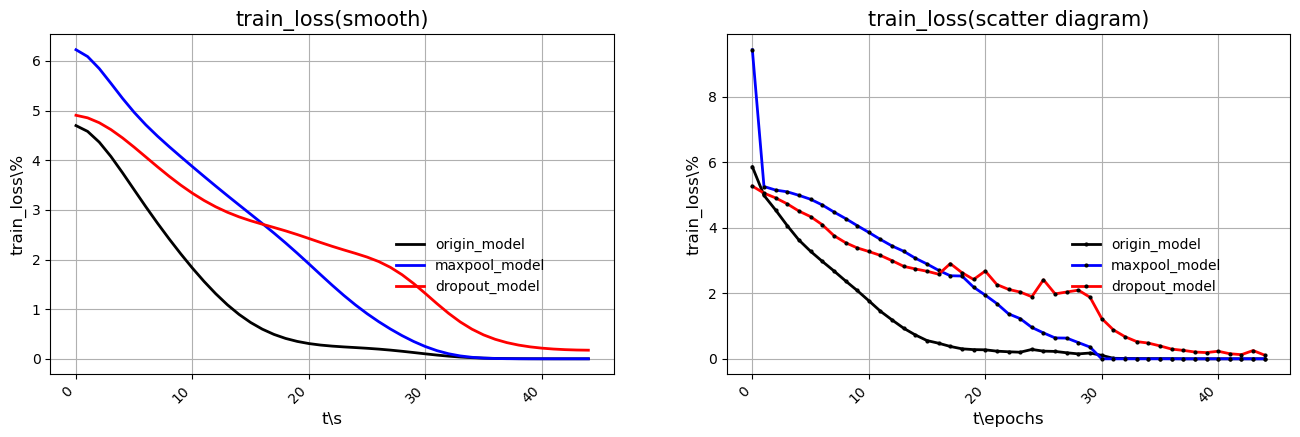

In [179]:
import matplotlib.pyplot as plt  
from scipy.ndimage import gaussian_filter1d

fig = plt.figure(figsize=(16, 5))

def image(plt,df,name,epoch,smooth,color,label):
        if smooth == -1:
                plt.subplot(1,2,1)
        if smooth !=0:
                if smooth == -1:
                        sigma = 3
                else:
                        sigma = smooth
                y_smoothed = gaussian_filter1d(df[name][:epoch], sigma=sigma)
                plt.plot(df_train0["epoch"][:epoch], # x轴数据
                        y_smoothed, # y轴数据
                        linestyle = '-', # 折线类型
                        linewidth = 2, # 折线宽度
                        label=label,
                        color = color, # 折线颜色
                        ) 
                plt.xlabel('t\s',size = 12)
                plt.ylabel(name+"\%",size =12)
                plt.legend(loc=4, edgecolor='w', framealpha=0, ncol=1, bbox_to_anchor=(0.9,0.2))
                plt.grid()     
                plt.title(name+"(smooth)",size=15)
                fig.autofmt_xdate(rotation = epoch)        
        if smooth == -1:
                plt.subplot(1,2,2)
        if smooth <= 0:
                plt.plot(df_train0["epoch"][:epoch], # x轴数据
                        df[name][:epoch], # y轴数据
                        linestyle = '-', # 折线类型
                        linewidth = 2, # 折线宽度
                        label=label,
                        color = color, # 折线颜色
                        marker = 'o', # 点的形状
                        markersize = 2, # 点的大小
                        markeredgecolor='black', # 点的边框色
                        markerfacecolor='black'# 点的填充色
                        ) 
                plt.xlabel('t\epochs',size = 12)
                plt.ylabel(name+"\%",size =12)
                plt.legend(loc=4, edgecolor='w', framealpha=0, ncol=1, bbox_to_anchor=(0.9,0.2))
                plt.grid()     
                plt.title(name+"(scatter diagram)",size=15)
                fig.autofmt_xdate(rotation = epoch)
        return 

def plt_image(name,epoch,smooth,save):
        global plt
        image(plt,df_train0,name,epoch,smooth,'black',"origin_model")
        image(plt,df_train1,name,epoch,smooth,'blue',"maxpool_model")
        image(plt,df_train2,name,epoch,smooth,'red',"dropout_model")
        plt.show()
        if save:
                fig.savefig(r'image/'+'resnet50'+name, dpi=300, bbox_inches='tight')
        return 
'''
name:df中要作图的指标'train_loss','train_acc1', "train_acc5",'val_loss','val_acc1', 'val_acc5',"f1_score"
epoch：画到第几轮时的数据
smooth：是否需要平滑化
        0：不需
        >0：需,且该数为平滑化sigma程度
        -1：散点图和平滑化后的图都留下,default sigma=5
save:是否保存
'''
plt_image("train_loss",45,-1,1)